<a href="https://colab.research.google.com/github/mayatahir/ECGR-5105/blob/master/Homework_7_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 7
## CIFAR10 Classification with CNN and ResNet10


In [ ]:
#Importing Relevant Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from pathlib import Path
from google.colab import drive

## Problem 1 (50pts):

a. Build a Convolutional Neural Network, like what we built in lectures to classify the images across all 10 classes in CIFAR 10. You need to adjust the fully connected layer at the end properly concerning the number of output classes. Train your network for 300 epochs. Report your training time, training loss, and evaluation accuracy after 300 epochs. Analyze your results in your report and compare them against a fully connected network (homework 6) on training time, achieved accuracy, and model size. Make sure to submit your code by providing the GitHub URL of your course repository for this course.



b. Extend your CNN by adding one more additional convolution layer followed by an activation function and pooling function. You also need to adjust your fully connected layer properly with respect to intermediate feature dimensions. Train your network for 300 epochs. Report your training time, loss, and evaluation accuracy after 300 epochs. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem1.a. Do you see any over-fitting? Make sure to submit your code by providing the GitHub URL of your course repository for this course.

In [ ]:
# Read CIFAR-10 dataset
data_path = './cifar10'
batch_size = 64
cifar10 = datasets.CIFAR10(data_path, train = True, download = True)
cifar10_val = datasets.CIFAR10(data_path, train = False, download = True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:12<00:00, 13164126.74it/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


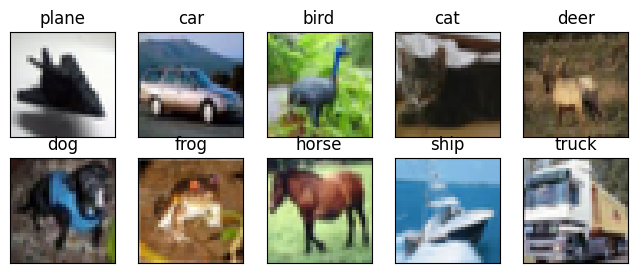

In [ ]:
fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2,5,1+i, xticks=[], yticks=[])
    ax.set_title(classes[i])
    img = next(img for img, label in cifar10 if label ==i)
    plt.imshow(img)
plt.show()

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))]) # mean and std the from slides


cifar10_train = datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(cifar10_train, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

cifar10_val = datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(cifar10_val, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=64,shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,shuffle=False)

learning_rate = 1e-3
n_epochs = 300

## 1.a. CNN

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size = 3, padding = 1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    main_tic = time.perf_counter()
    for epoch in range(1, n_epochs + 1):
        loss_train = 0
        tic = time.perf_counter()
        for imgs, labels in train_loader:
            imgs = imgs
            labels = labels
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        toc = time.perf_counter()
        print(f"Epoch {epoch}, Training Duration = {round(toc - tic, 3)} seconds, Training Loss: {round(loss_train / len(train_loader), 5)}")

    main_toc = time.perf_counter()
    print(f"Training Time = {round(main_toc - main_tic, 3)} seconds")
    print(f"Training Time per Epoch = {round((main_toc - main_tic) / n_epochs , 3)} seconds")

In [ ]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

Epoch 1, Training Duration = 32.213 seconds, Training Loss: 1.5394
Epoch 2, Training Duration = 28.914 seconds, Training Loss: 1.20072
Epoch 3, Training Duration = 29.822 seconds, Training Loss: 1.1087
Epoch 4, Training Duration = 27.787 seconds, Training Loss: 1.05536
Epoch 5, Training Duration = 27.735 seconds, Training Loss: 1.01081
Epoch 6, Training Duration = 27.352 seconds, Training Loss: 0.97106
Epoch 7, Training Duration = 27.2 seconds, Training Loss: 0.94226
Epoch 8, Training Duration = 27.384 seconds, Training Loss: 0.91856
Epoch 9, Training Duration = 27.565 seconds, Training Loss: 0.89998
Epoch 10, Training Duration = 27.939 seconds, Training Loss: 0.88092
Epoch 11, Training Duration = 28.141 seconds, Training Loss: 0.86446
Epoch 12, Training Duration = 28.092 seconds, Training Loss: 0.84891
Epoch 13, Training Duration = 28.69 seconds, Training Loss: 0.83824
Epoch 14, Training Duration = 27.815 seconds, Training Loss: 0.82524
Epoch 15, Training Duration = 27.925 seconds, Tr

In [ ]:
def validate(model, train_loader, val_loader):
    for name, loader in [("Training", train_loader), ("Validation", val_loader)]:
        correct = 0
        total = 0
        val_tic = time.perf_counter()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs
                labels = labels
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        val_toc = time.perf_counter()

        print(f"{name} Accuracy: {round(correct/total, 3)}, Duration = {round(val_toc - val_tic, 3)} seconds")

In [ ]:
validate(model, train_loader, val_loader)

Training Accuracy: 0.861, Duration = 21.367 seconds
Validation Accuracy: 0.592, Duration = 3.92 seconds


In [ ]:
# Inspect model parameters
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]
print("Model parameters: " + str(numel_list))
print("Total parameters: " + str(sum(numel_list)))


Model parameters: [432, 16, 1152, 8, 16384, 32, 320, 10]
Total parameters: 18354


## 1.b. CNN with 4 convolutional layers

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size = 3, padding = 1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(8, 4, kernel_size = 3, padding = 1)
        self.act3 = nn.Tanh()
        self.pool3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(4 * 4 * 4, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = self.pool3(self.act3(self.conv3(out)))
        out = out.view(-1, 4 * 4 * 4)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    main_tic = time.perf_counter()
    for epoch in range(1, n_epochs + 1):
        loss_train = 0
        tic = time.perf_counter()
        for imgs, labels in train_loader:
            imgs = imgs
            labels = labels
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        toc = time.perf_counter()
        print(f"Epoch {epoch}, Training Duration = {round(toc - tic, 3)} seconds, Training Loss: {round(loss_train / len(train_loader), 5)}")

    main_toc = time.perf_counter()
    print(f"Training Time = {round(main_toc - main_tic, 3)} seconds")
    print(f"Training Time per Epoch = {round((main_toc - main_tic) / n_epochs , 3)} seconds")

In [ ]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

Epoch 1, Training Duration = 26.882 seconds, Training Loss: 1.67371
Epoch 2, Training Duration = 27.196 seconds, Training Loss: 1.37657
Epoch 3, Training Duration = 27.544 seconds, Training Loss: 1.29731
Epoch 4, Training Duration = 28.598 seconds, Training Loss: 1.24867
Epoch 5, Training Duration = 27.348 seconds, Training Loss: 1.20784
Epoch 6, Training Duration = 28.128 seconds, Training Loss: 1.18039
Epoch 7, Training Duration = 27.623 seconds, Training Loss: 1.15714
Epoch 8, Training Duration = 27.574 seconds, Training Loss: 1.1389
Epoch 9, Training Duration = 27.399 seconds, Training Loss: 1.12425
Epoch 10, Training Duration = 27.082 seconds, Training Loss: 1.10933
Epoch 11, Training Duration = 27.195 seconds, Training Loss: 1.09787
Epoch 12, Training Duration = 27.436 seconds, Training Loss: 1.08772
Epoch 13, Training Duration = 27.433 seconds, Training Loss: 1.07796
Epoch 14, Training Duration = 27.601 seconds, Training Loss: 1.07043
Epoch 15, Training Duration = 27.696 seconds

In [ ]:
def validate(model, train_loader, val_loader):
    for name, loader in [("Training", train_loader), ("Validation", val_loader)]:
        correct = 0
        total = 0
        val_tic = time.perf_counter()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs
                labels = labels
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        val_toc = time.perf_counter()

        print(f"{name} Accuracy: {round(correct/total, 3)}, Duration = {round(val_toc - val_tic, 3)} seconds")

validate(model, train_loader, val_loader)

Training Accuracy: 0.702, Duration = 21.752 seconds
Validation Accuracy: 0.648, Duration = 4.942 seconds


In [ ]:
# Inspect model parameters
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]
print("Model parameters: " + str(numel_list))
print("Total parameters: " + str(sum(numel_list)))


Model parameters: [432, 16, 1152, 8, 288, 4, 2048, 32, 320, 10]
Total parameters: 4310
